# Описание проекта

# Предсказание оттока клиентов банка


## Данные

В наличии имеются следующие исторические данные о поведении клиентов и расторжении договоров с банком:
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — количество недвижимости у клиента
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Источник данных: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

## Задача
Нужно спрогнозировать, уйдёт ли клиент из банка в ближайшее время или нет

## Навыки и инструменты
*pandas, sklearn, matplotlib, numpy, math, машинное обучение*

## Описание проекта
Из банка стали уходить клиенты каждый месяц. 
Спрогнозирована вероятность ухода клиента из банка в ближайшее время.
Построена модель с предельно большим значением F1-меры с последующей проверкой на тестовой выборке.

# 1. Подготовка данных

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib
from sklearn import tree
from sklearn.model_selection import cross_val_score
import seaborn as sns
import math
import calendar
from scipy import stats as st
from math import factorial
pd.set_option('display.max_columns', 100)# можно не 100, а none
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import classification_report
#import mglearn
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, roc_auc_score

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.preprocessing import Imputer

In [3]:
#pip install mglearn

In [4]:
import mglearn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


#### Загрузим и посмотрим данные

In [5]:
clients = pd.read_csv("Churn.csv")
print(clients.shape)
print(clients.info())
clients.head()

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Таблица содержит в себе информацию о клиентах «Бета-Банка». Она содержит 10000 строк и 14 столбцов. Всртечается 2 типа данных: вещественные числа (3 столбца),целые числа (8 столбцов) и строки (3 столбца).

### При формировании обучающей выборки избавимся от столбцов, "RowNumber", "CustomerId", "Surname", потому, что они не несут информации, необходимой для классификации

In [6]:
clients_clean = clients.drop(["RowNumber", "CustomerId", "Surname"],  axis=1)
clients_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Заполним пропуски в столбце "Tenure" с помощью машинного обучения

Отделим часть датасета, без прпусков

In [7]:
clients_clean_not_nan = clients_clean[~clients_clean.Tenure.isnull()]
clients_clean_not_nan.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Проведем кодирование категориальных признаков

In [8]:
clients_clean_not_nan_ohe = pd.get_dummies(clients_clean_not_nan, drop_first=True)

In [9]:
clients_clean_not_nan_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


### Проведем разделение датасета на обучающие данные и целевой признак, а  затем сформируем обучающий и тестовый наборы данных отдельно для обучающей и валидационной выборок

In [10]:
target = clients_clean_not_nan_ohe['Tenure']
features = clients_clean_not_nan_ohe.drop(('Tenure'),  axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

### Проведем масштабирование численных признаков

In [11]:
numeric = ['CreditScore', 'Age', 'Balance', "NumOfProducts", "EstimatedSalary"]

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

print(features_train.shape)

(6818, 11)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Борис\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Проверим, что получилось

In [12]:
features_train.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1507,-1.037187,0.375163,0.937205,-0.91164,1,0,-1.635163,0,1,0,0
7431,0.297802,-0.096680,-1.233158,0.81060,1,0,-0.590123,0,0,0,1
7509,-1.078582,-0.191049,0.307627,0.81060,0,1,0.073185,0,1,0,1
5674,-1.130326,-1.040366,-1.233158,0.81060,0,0,1.674643,0,0,1,1
7363,-0.478354,0.092057,0.420246,0.81060,1,1,-1.069473,0,0,0,1


Обучим модель на основе логистической регресси для заполнения пропусков

In [13]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("Linear Regression")
print(mean_absolute_error(target_valid, predicted_valid))
print()

predicted_valid = pd.Series(target_train.median(), index=target_valid.index)
print("Median")
print(mean_absolute_error(target_valid, predicted_valid))


Linear Regression
2.459505652537961

Median
2.445666520017598


Видим, что МАЕ модели построенная на основе медианы, дает лучший результат, чем МАЕ модели. Аналогичный результат был получен и для модели случайного леса при разных параметрах. Поэтому заполним пропуски медианным значением. Оно равно:

In [14]:
target_train.median()

5.0

Произведем заполнениие пропусков

In [15]:
clients_clean = clients_clean.fillna(5)
clients_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Видим, что пропуски заполнились

## Теперь подготовим данные для машинного обучения в рамках основной задачи, по определению вероятности ухода клиента

### Проведем кодирование категориальных признаков

In [16]:
clients_clean_ohe = pd.get_dummies(clients_clean, drop_first=True)

In [17]:
clients_clean_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


### Проведем масштабирование численных признаков

In [18]:
numeric = ['CreditScore', 'Age', 'Balance', "NumOfProducts", "EstimatedSalary", "Tenure"]

scaler = StandardScaler()
scaler.fit(clients_clean_ohe[numeric])
clients_clean_ohe[numeric] = scaler.transform(clients_clean_ohe[numeric])

print(clients_clean_ohe.shape)

(10000, 12)


Проверим, что получилось

In [19]:
clients_clean_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.086246,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.448581,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.087768,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.448581,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.086246,0.785728,-0.911583,1,1,-0.365276,0,0,1,0


### Проведем разделение датасета на обучающие данные и целевой признак, а  затем сформируем обучающий и тестовый наборы данных отдельно для обучающей, валидационной и тестовой выборок

Разобъем данные на три части: обучающую, валидационную и тестовую. Сначало разобьем на 2 части, а потом одну часть еще раз разделим

In [20]:
df_train, df_valid_and_test = train_test_split(clients_clean_ohe, test_size=0.4,  random_state=12345)

In [21]:
df_valid,  df_test = train_test_split(df_valid_and_test, test_size=0.5,  random_state=12345)

Проверим размеры наших выборок

In [22]:
print(df_train.shape[0] / clients_clean_ohe.shape[0] * 100)
print(df_valid.shape[0] / clients_clean_ohe.shape[0] * 100)
print(df_test.shape[0] / clients_clean_ohe.shape[0] * 100)

60.0
20.0
20.0


Видим, что выборки сформировались правильно

Сформируем обучающий и тестовый наборы данных отдельно для обучающей, валидационной и тестовой выборок

In [23]:
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

Все Ок! Выборки готовы, обучим и исследуем модели без учета дисбаланса классов

# 2. Исследование задачи

### Иследование баланс классов

Перед подбором и обучением моделей важно понимать с какой выборкой мы имеем дело - сбалансированной или несбалансированной. Изучим нашу выборку на предмет баланса классов.

Частота классов:
 0    0.7963
1    0.2037
Name: Exited, dtype: float64


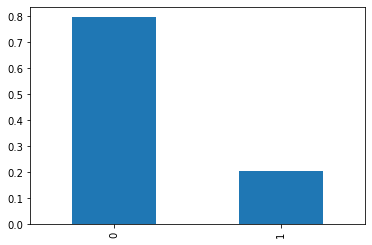

In [24]:
class_frequency = clients_clean['Exited'].value_counts(normalize=True)
print("Частота классов:\n", class_frequency)
class_frequency.plot(kind='bar')

Наблюдается дисбаланс классов в сообношении 4:1. Поработаем сначало с такой выборкой, а потом попробуем улучшить ситуацию для невелирования дисбаланса с помощью различных методик. 

## 2.1. Иcследование качества модели "Решающее дерево"

Исследуем качество модели "Решающее дерево" в зависимости от макропараметра max_depth

In [25]:
metrics_DecisionTreeClassifier = pd.DataFrame([])
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    train_predictions = model.predict(features_train)
    train_predictions_2 = model.predict(features_valid)
     
    metrics_temp = pd.DataFrame({"max_depth": [depth],
                               "accuracy_train": [accuracy_score(target_train, train_predictions)],
                               "accuracy_valid": [accuracy_score(target_valid, train_predictions_2)],
                               
                               "recall_train": [recall_score(target_train, train_predictions)],
                               "recall_valid": [recall_score(target_valid, train_predictions_2)],
                               
                               "precision_train": [precision_score(target_train, train_predictions)],
                               "precision_valid": [precision_score(target_valid, train_predictions_2)], 
                                 
                               "f1_score_train": [f1_score(target_train, train_predictions)],
                               "f1_score_valid": [f1_score(target_valid, train_predictions_2)]
                               })
    metrics_DecisionTreeClassifier = metrics_DecisionTreeClassifier.append(metrics_temp) 
 
    
    #[accuracy_score(target_train, train_predictions), accuracy_score(target_valid, train_predictions_2)]

metrics_DecisionTreeClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,max_depth,accuracy_train,accuracy_valid,recall_train,recall_valid,precision_train,precision_valid,f1_score_train,f1_score_valid
0,1,0.800667,0.7910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,2,0.835333,0.8240,0.437291,0.459330,0.624105,0.603774,0.514258,0.521739
0,3,0.846333,0.8380,0.274247,0.284689,0.858639,0.826389,0.415716,0.423488
0,4,0.856000,0.8520,0.423077,0.437799,0.744118,0.750000,0.539446,0.552870
0,5,0.864500,0.8530,0.428930,0.413876,0.797823,0.779279,0.557912,0.540625
0,6,0.872333,0.8580,0.474080,0.449761,0.805398,0.776860,0.596842,0.569697
0,7,0.881333,0.8505,0.491639,0.406699,0.849711,0.769231,0.622881,0.532081
0,8,0.888667,0.8500,0.512542,0.430622,0.878223,0.743802,0.647307,0.545455
0,9,0.898833,0.8450,0.608696,0.478469,0.839677,0.684932,0.705768,0.563380


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Метрики для DecisionTreeClassifier')

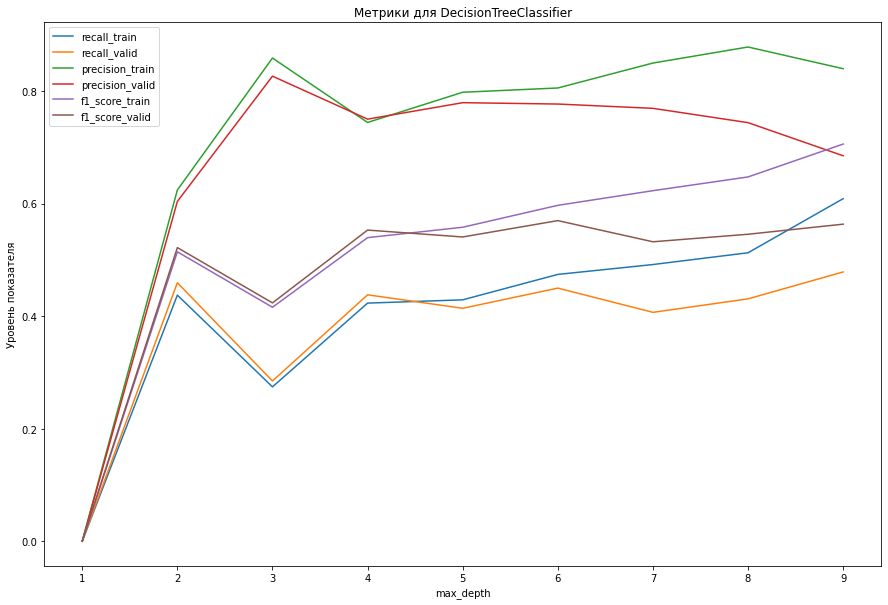

In [26]:
plt.subplots(figsize=(15,10))
plt.legend(loc="lower right")
for i in metrics_DecisionTreeClassifier.columns[[3, 4, 5, 6, 7, 8]]:
    sns.lineplot(x="max_depth", y=i, data = metrics_DecisionTreeClassifier, label = i, markers=True)

plt.ylabel('Уровень показателя')
plt.title('Метрики для DecisionTreeClassifier')

Вывод: максимальный f1 в 0,57 достигается при глубине дерева 6. Вместе с тем мы видим, что дерево не сильно переучено - разность в accuracy_train и accuracy_valid около 0,02.  Но дерево все равно не обеспечивает качество f1 на уровне  0,59

Посмотрим на динамику PR-кривой при разных глубинах дерева

Средняя точность ap_rf для max_depth = 5 составила 0.627 
Средняя точность ap_rf для max_depth = 6 составила 0.629 
Средняя точность ap_rf для max_depth = 7 составила 0.606 
Средняя точность ap_rf для max_depth = 8 составила 0.590 


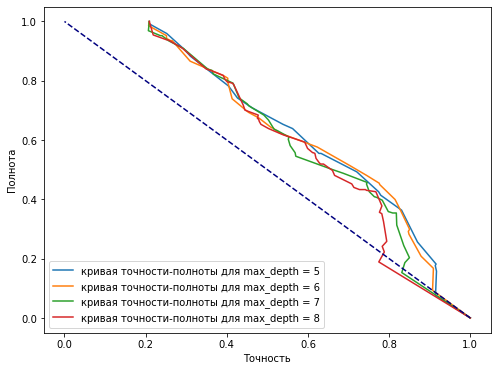

In [27]:
plt.subplots(figsize=(8,6))
for depth in range(5, 9):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    train_predictions_prop = model.predict_proba(features_valid)
    precision, recall, thresholds = precision_recall_curve(target_valid, train_predictions_prop[:, 1])
    plt.plot(precision, recall, label="кривая точности-полноты для max_depth = {:}".format(depth))
    plt.xlabel("Точность")
    plt.ylabel("Полнота")
    plt.legend(loc="best")
    ap_rf = average_precision_score(target_valid, train_predictions_prop[:, 1])
    print("Средняя точность ap_rf для max_depth = {:} составила {:.3f} ".format(depth, ap_rf))

plt.plot([1, 0], [0, 1], color='navy', linestyle='--')

Построим PR- и ROC кривые для выбранной модели и оценим такие показатели как "Площадь под PR-кривой" (он также известен как метод средней точности (average precision) - ap_rf и "Площадь по ROC-кривой" - auc_roc. Сохраним эти данные в датафрем metrics и далее будем его дополнять.

In [28]:
metrics = pd.DataFrame([])

In [29]:
def metrics_graph (name_model, model):
    model.fit(features_train, target_train)
    fig,axs = plt.subplots(figsize=(15, 5), ncols=2, nrows=1)
    train_predictions_prop = model.predict_proba(features_valid)
    
    train_predictions = model.predict(features_valid)
        
    precision, recall, thresholds = precision_recall_curve(target_valid, train_predictions_prop[:, 1])
    sns.lineplot(precision, recall, ax = plt.subplot2grid((1,2), (0,0), colspan=1))
    plt.xlabel("Точность")
    plt.ylabel("Полнота")
    plt.legend(loc="best")
    ap_rf = average_precision_score(target_valid, train_predictions_prop[:, 1])
    plt.plot([1, 0], [0, 1], color='navy', linestyle='--')
    plt.title("PR-кривая для модели {}".format(name_model)) 
    
    probabilities_one_valid = train_predictions_prop[:, 1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    sns.lineplot(x = fpr, y = tpr, linestyle='-', ax = plt.subplot2grid((1,2), (0,1), colspan=1)) ### синяя ROC-кривая
    plt.step(fpr, tpr, where="post") ### ступенчатая ROC-кривая
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title("ROC-кривая для модели {}".format(name_model)) 
    plt.show()
   
    temp_metrics = pd.DataFrame({"Модель": [name_model],
                               "f1-мера": [f1_score(target_valid, model.predict(features_valid))],
                               "Средняя точность (ap_rf)": [ap_rf],
                               "AUR-ROC": [roc_auc_score(target_valid, probabilities_one_valid)]}) 
    global metrics
    metrics = metrics.append(temp_metrics)
    return metrics

No handles with labels found to put in legend.


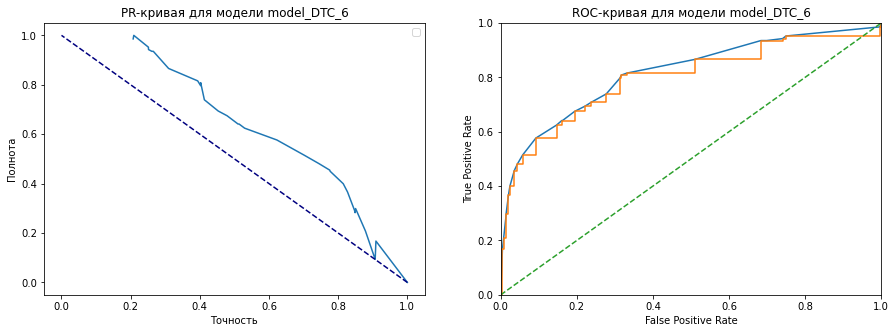

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463


In [30]:
metrics_graph ("model_DTC_6", DecisionTreeClassifier(random_state=12345, max_depth=6))

### Изменение качества модели, при измееннии порога классификации

In [31]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.2, 0.4, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.4f}".format(threshold, precision, recall, f1))
    


Порог = 0.20 | Точность = 0.41, Полнота = 0.74, f1 = 0.5300
Порог = 0.22 | Точность = 0.48, Полнота = 0.67, f1 = 0.5601
Порог = 0.24 | Точность = 0.51, Полнота = 0.64, f1 = 0.5684
Порог = 0.26 | Точность = 0.62, Полнота = 0.58, f1 = 0.5988
Порог = 0.28 | Точность = 0.62, Полнота = 0.58, f1 = 0.5988
Порог = 0.30 | Точность = 0.62, Полнота = 0.58, f1 = 0.5988
Порог = 0.32 | Точность = 0.70, Полнота = 0.51, f1 = 0.5939
Порог = 0.34 | Точность = 0.70, Полнота = 0.51, f1 = 0.5939
Порог = 0.36 | Точность = 0.70, Полнота = 0.51, f1 = 0.5939
Порог = 0.38 | Точность = 0.70, Полнота = 0.51, f1 = 0.5939


Мы видим, что требуемое значение f1 достигается при использовании решающего дерева с глубиной 6 и пороге классификации 0,26 - 0.5988, что больше чем у обычного дерева - 0,57.

Модель соответствует требованиям задания.

Построим гарфик приянтия решения нашим деревом. 

Определим 2 признака, которые оказывают наибольшее влиние на принятие решения

In [32]:
feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({"features": list(features_train), "feature_importances": feature_importances})
feature_importances_df.sort_values("feature_importances", ascending = False)

,features,feature_importances
1,Age,0.386834
4,NumOfProducts,0.285521
6,IsActiveMember,0.147319
3,Balance,0.082449
8,Geography_Germany,0.059313
7,EstimatedSalary,0.017347
0,CreditScore,0.009878
10,Gender_Male,0.003219
5,HasCrCard,0.003219
9,Geography_Spain,0.002930


Возраст и количесвто продуктов оказывают наибольше влияние на отток клиентов (для ускорения работы программы закомментирую этот код)

## 2.2. Исследование качества модели "Решающее дерево" при его настройке с помощью GridSearchCV

In [33]:
model_DTC = DecisionTreeClassifier(random_state=12345)
parametrs_DTC = {"criterion": ["gini", "entropy"], "max_depth": range(5, 8), "min_samples_split": range(30, 100, 5), "min_samples_leaf": range(1, 31, 2)}

grid_search_cv_model_DTC = GridSearchCV(model_DTC, parametrs_DTC, cv = 5, scoring='f1')
grid_search_cv_model_DTC.fit(features_train, target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=12345,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 8),
                         

Посмотрим на лучшие параметры

In [34]:
grid_search_cv_model_DTC.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 75}

Применим эти параметры и определим f1 при них 

In [35]:
model_GridSearchCV_DTC_2 = grid_search_cv_model_DTC.best_estimator_

In [36]:
train_predictions = model_GridSearchCV_DTC_2.predict(features_valid)
print("f1_score_valid = ", f1_score(target_valid, train_predictions))

f1_score_valid =  0.5697151424287856


Показатель f1 = 0,56 - не соответсвует требованию задания.

Построим PR- и ROC кривые для выбранной модели и оценим такие показатели как "Площадь по PR-кривой" (он также известен как метод средней точности (average precision) - ap_rf и "Площадь по ROC-кривой" - auc_roc. Сохраним эти данные в датафрем metrics и далее будем его дополнять.

No handles with labels found to put in legend.


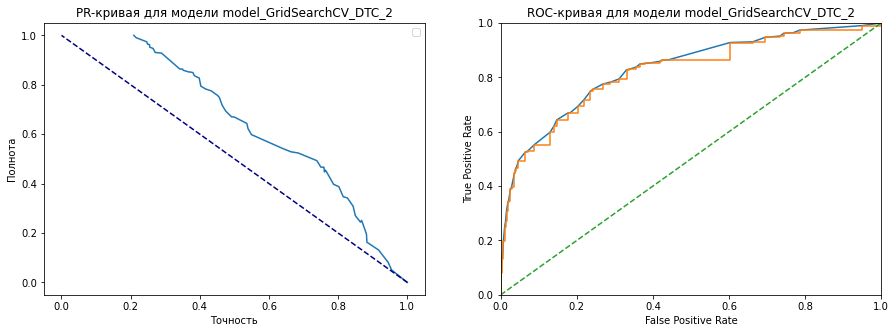

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271


In [37]:
metrics_graph ("model_GridSearchCV_DTC_2", model_GridSearchCV_DTC_2)

Несмотря на то, что f1 пока не соответсвует требуемому значению, показатель Средняя точность (ap_rf) и AUR-ROC у решающего дерева с GridSearchCV выше чем у обычного решающего дерева	

### Изменение качества модели, при измееннии порога классификации

In [38]:
probabilities_valid = model_GridSearchCV_DTC_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.3, 0.45, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.3f}".format(threshold, precision, recall, f1))
    


Порог = 0.30 | Точность = 0.55, Полнота = 0.60, f1 = 0.573
Порог = 0.31 | Точность = 0.55, Полнота = 0.60, f1 = 0.573
Порог = 0.32 | Точность = 0.62, Полнота = 0.55, f1 = 0.586
Порог = 0.33 | Точность = 0.64, Полнота = 0.54, f1 = 0.587
Порог = 0.34 | Точность = 0.64, Полнота = 0.54, f1 = 0.587
Порог = 0.35 | Точность = 0.66, Полнота = 0.53, f1 = 0.589
Порог = 0.36 | Точность = 0.66, Полнота = 0.53, f1 = 0.589
Порог = 0.37 | Точность = 0.68, Полнота = 0.52, f1 = 0.593
Порог = 0.38 | Точность = 0.68, Полнота = 0.52, f1 = 0.593
Порог = 0.39 | Точность = 0.74, Полнота = 0.49, f1 = 0.591
Порог = 0.40 | Точность = 0.74, Полнота = 0.49, f1 = 0.591
Порог = 0.41 | Точность = 0.74, Полнота = 0.49, f1 = 0.591
Порог = 0.42 | Точность = 0.75, Полнота = 0.47, f1 = 0.575
Порог = 0.43 | Точность = 0.76, Полнота = 0.47, f1 = 0.578
Порог = 0.44 | Точность = 0.76, Полнота = 0.47, f1 = 0.578
Порог = 0.45 | Точность = 0.76, Полнота = 0.47, f1 = 0.578


Модель проходит при пороге 0,37

### <font color='blue'> Промежуточный вывод: целевого уровня f1 можно достичь при использовании модели "Решающее дерево" при глубине 6 и пороге классификации 0,26, f1 = 0.5988. И "Решающее дерево" настроенное с помощью GridSearchCV и Порогом = 0.37

Посморим, что можно выжать из модели "Случайный лес". Возмем для начала глубину 6, как в лучшем результате из рещающего леса. 

## 2.3. Иcследование качества модели "Случайный лес" при глубине 6

Исследуем качество модели "Случайный лес" в зависимости от макропараметра  n_estimators

In [39]:
metrics_RandomForestClassifier = pd.DataFrame([])
for estimators in range(6, 20, 2):
    model_RFS = RandomForestClassifier(random_state = 12345, n_estimators = estimators, max_depth=6)
    model_RFS.fit(features_train, target_train)
    train_predictions = model_RFS.predict(features_train)
    train_predictions_2 = model_RFS.predict(features_valid)
    metrics_temp_RFS = pd.DataFrame({"n_estimators": [estimators],
                               "accuracy_train": [accuracy_score(target_train, train_predictions)],
                               "accuracy_valid": [accuracy_score(target_valid, train_predictions_2)],
                               
                               "recall_train": [recall_score(target_train, train_predictions)],
                               "recall_valid": [recall_score(target_valid, train_predictions_2)],
                               
                               "precision_train": [precision_score(target_train, train_predictions)],
                               "precision_valid": [precision_score(target_valid, train_predictions_2)], 
                                 
                               "f1_score_train": [f1_score(target_train, train_predictions)],
                               "f1_score_valid": [f1_score(target_valid, train_predictions_2)]
                               })
    metrics_RandomForestClassifier = metrics_RandomForestClassifier.append(metrics_temp_RFS) 


metrics_RandomForestClassifier

,n_estimators,accuracy_train,accuracy_valid,recall_train,recall_valid,precision_train,precision_valid,f1_score_train,f1_score_valid
0,6,0.867500,0.8545,0.413880,0.382775,0.840407,0.829016,0.554622,0.523732
0,8,0.867667,0.8595,0.404682,0.392344,0.855124,0.858639,0.549376,0.538588
0,10,0.867667,0.8620,0.410535,0.399522,0.846552,0.869792,0.552928,0.547541
0,12,0.870000,0.8605,0.413043,0.401914,0.863636,0.852792,0.558824,0.546341
0,14,0.867000,0.8600,0.401338,0.399522,0.854093,0.852041,0.546075,0.543974
0,16,0.870500,0.8600,0.416388,0.401914,0.863085,0.848485,0.561760,0.545455
0,18,0.869500,0.8595,0.402174,0.387560,0.876138,0.866310,0.551289,0.535537


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Метрики для RandomForestClassifier')

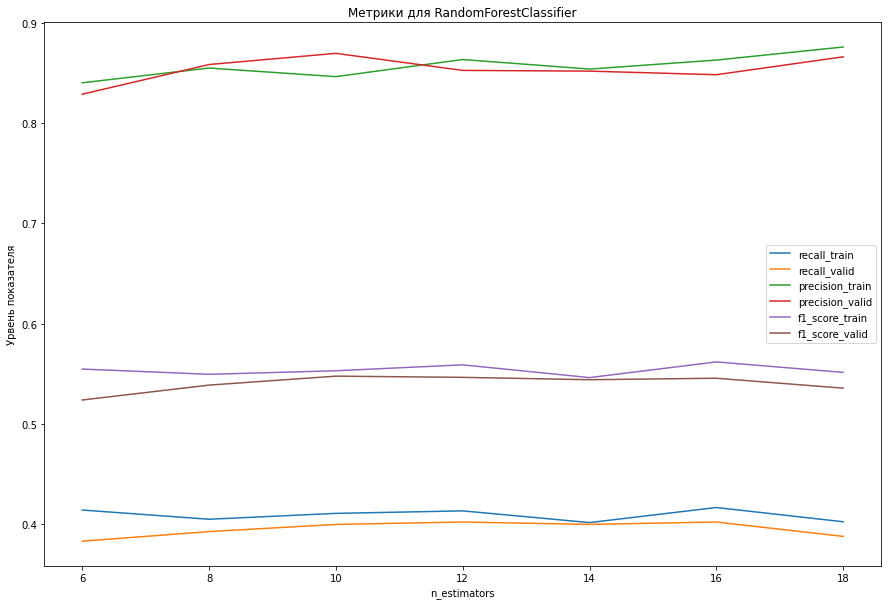

In [40]:
plt.subplots(figsize=(15,10))
plt.legend(loc="lower right")
for i in metrics_RandomForestClassifier.columns[[3, 4, 5, 6, 7, 8]]:
    sns.lineplot(x="n_estimators", y=i, data = metrics_RandomForestClassifier, label = i, markers=True)

plt.ylabel('Урвень показателя')
plt.title('Метрики для RandomForestClassifier')

Вывод: максимальный f1 в 0,54 достигается при количестве деревьев 10. Вместе с тем мы видим, что лес не переучен - разность в accuracy_train и accuracy_valid почти отсутсвует.  Модель не обеспечивает качество f1 на уровне  0,59


Построим PR- и ROC кривые для выбранной модели и оценим такие показатели как "Площадь по PR-кривой" (он также известен как метод средней точности (average precision) - ap_rf и "Площадь по ROC-кривой" - auc_roc. Сохраним эти данные в датафрем metrics и далее будем его дополнять.


No handles with labels found to put in legend.


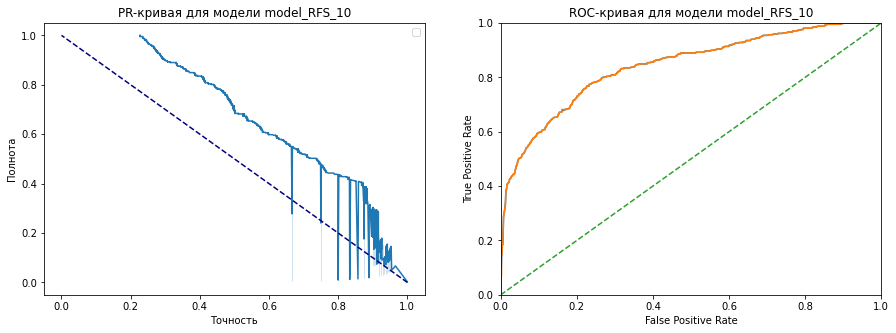

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271
0,model_RFS_10,0.547541,0.675990,0.841686


In [41]:
metrics_graph ("model_RFS_10", RandomForestClassifier(random_state = 12345, n_estimators = 10, max_depth=6))

У модели самый хороший показатель средней точности и AUR-ROC, но f1-мера ниже

### Изменение качества модели, при измееннии порога классификации

In [42]:
probabilities_valid = model_RFS.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.2, 0.4, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.4f}".format(threshold, precision, recall, f1))

Порог = 0.20 | Точность = 0.49, Полнота = 0.74, f1 = 0.5917
Порог = 0.22 | Точность = 0.53, Полнота = 0.68, f1 = 0.5971
Порог = 0.24 | Точность = 0.57, Полнота = 0.65, f1 = 0.6090
Порог = 0.26 | Точность = 0.59, Полнота = 0.61, f1 = 0.6047
Порог = 0.28 | Точность = 0.64, Полнота = 0.59, f1 = 0.6146
Порог = 0.30 | Точность = 0.65, Полнота = 0.57, f1 = 0.6089
Порог = 0.32 | Точность = 0.66, Полнота = 0.56, f1 = 0.6072
Порог = 0.34 | Точность = 0.68, Полнота = 0.55, f1 = 0.6077
Порог = 0.36 | Точность = 0.69, Полнота = 0.53, f1 = 0.6019
Порог = 0.38 | Точность = 0.72, Полнота = 0.52, f1 = 0.6019


Мы видим, что требуемое значение f1 достигается уже при использовании случайного леса с количеством деревьев 10, глубине 6 и пороге классификации 0,28 - 0.6146, что больше чем у обычного дерева. Но посмотрим, как модель рааботает на тестовом множестве.

### 2.4. Исследование качества модели "Случайный лес" при его настройке с помощью GridSearchCV

В дальнейшем я буду комменировать строки с GridSearchCV для ускорения работы кода. А лучшие параметры буду передавать модели вручную.

In [43]:
#model_RFC = RandomForestClassifier()
#parametrs_RFC = {"criterion": ["gini", "entropy"], "n_estimators": range(12, 16), "max_depth": range(5, 7), "min_samples_split": range(30, 100, 10), "min_samples_leaf": range(1, 31, 5)}

#grid_search_cv_model_RFC = GridSearchCV(model_RFC, parametrs_RFC,cv = 5, scoring='f1')
#grid_search_cv_model_RFC.fit(features_train, target_train)

Посмотрим на лучшие параметры

In [44]:
#grid_search_cv_model_RFC.best_params_

Обучим модель model_GridSearchCV и определим f1 при этих параметрах 

In [45]:
model_GridSearchCV_RFC_2 = RandomForestClassifier(random_state = 12345, criterion = 'gini', max_depth = 6, min_samples_leaf = 1, min_samples_split = 70,
 n_estimators = 13)
model_GridSearchCV_RFC_2.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [46]:
train_predictions = model_GridSearchCV_RFC_2.predict(features_valid)
print("f1_score_valid = ", f1_score(target_valid, train_predictions))

f1_score_valid =  0.500823723228995


Модель не годится.

А что с графиками и показателями?

No handles with labels found to put in legend.


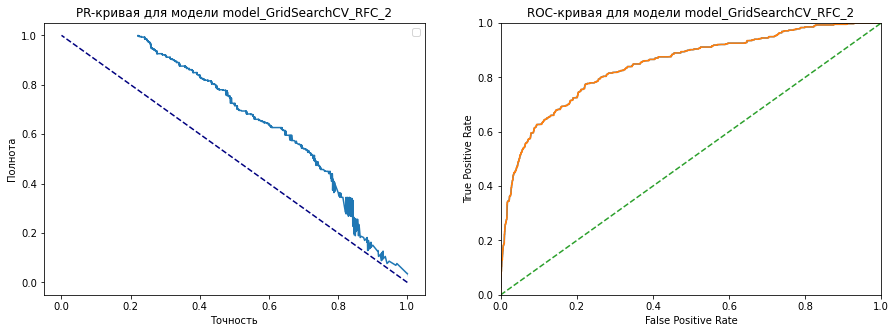

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271
0,model_RFS_10,0.547541,0.675990,0.841686
0,model_GridSearchCV_RFC_2,0.500824,0.671236,0.845789


In [47]:
metrics_graph ("model_GridSearchCV_RFC_2", model_GridSearchCV_RFC_2)

Показатели снизились

### Изменение качества модели, при измееннии порога классификации

In [48]:
probabilities_valid = model_GridSearchCV_RFC_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.20, 0.35, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.3f}".format(threshold, precision, recall, f1))
    


Порог = 0.20 | Точность = 0.48, Полнота = 0.78, f1 = 0.592
Порог = 0.21 | Точность = 0.49, Полнота = 0.75, f1 = 0.591
Порог = 0.22 | Точность = 0.50, Полнота = 0.72, f1 = 0.589
Порог = 0.23 | Точность = 0.51, Полнота = 0.70, f1 = 0.591
Порог = 0.24 | Точность = 0.53, Полнота = 0.69, f1 = 0.602
Порог = 0.25 | Точность = 0.55, Полнота = 0.68, f1 = 0.606
Порог = 0.26 | Точность = 0.57, Полнота = 0.66, f1 = 0.609
Порог = 0.27 | Точность = 0.59, Полнота = 0.65, f1 = 0.619
Порог = 0.28 | Точность = 0.61, Полнота = 0.63, f1 = 0.619
Порог = 0.29 | Точность = 0.64, Полнота = 0.62, f1 = 0.630
Порог = 0.30 | Точность = 0.65, Полнота = 0.60, f1 = 0.624
Порог = 0.31 | Точность = 0.66, Полнота = 0.58, f1 = 0.621
Порог = 0.32 | Точность = 0.68, Полнота = 0.56, f1 = 0.615
Порог = 0.33 | Точность = 0.70, Полнота = 0.55, f1 = 0.611
Порог = 0.34 | Точность = 0.71, Полнота = 0.53, f1 = 0.610


При пороге 0,29 f1 = f1 = 0.630

### <font color='blue'> Промежуточный вывод: Наибольшего уровня f1 = 0,63 можно достичь при использовании модели "Случайный лес" со следующими параметрами: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 60, 'n_estimators': 12} и порогом классификации - 0.29

## 2.5. Иcследование качества модели "Логистическая регрессия"

In [49]:
model_LR = LogisticRegression(solver='liblinear', random_state=12345)
model_LR.fit(features_train, target_train)
train_predictions = model_LR.predict(features_train)
print("Показатель f1 обучающей выборки: ", f1_score(target_train, train_predictions))
train_predictions = model_LR.predict(features_valid)
print("Показатель f1 валидационной выборки: ", f1_score(target_valid, train_predictions))

Показатель f1 обучающей выборки:  0.34378769601930037
Показатель f1 валидационной выборки:  0.33108108108108103


In [51]:
probabilities_valid = model_LR.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.05, 0.8, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.3f}".format(threshold, precision, recall, f1))

Порог = 0.05 | Точность = 0.23, Полнота = 0.98, f1 = 0.379
Порог = 0.10 | Точность = 0.28, Полнота = 0.90, f1 = 0.423
Порог = 0.15 | Точность = 0.33, Полнота = 0.79, f1 = 0.462
Порог = 0.20 | Точность = 0.37, Полнота = 0.68, f1 = 0.478
Порог = 0.25 | Точность = 0.42, Полнота = 0.60, f1 = 0.499
Порог = 0.30 | Точность = 0.45, Полнота = 0.52, f1 = 0.484
Порог = 0.35 | Точность = 0.49, Полнота = 0.43, f1 = 0.454
Порог = 0.40 | Точность = 0.50, Полнота = 0.33, f1 = 0.398
Порог = 0.45 | Точность = 0.52, Полнота = 0.28, f1 = 0.367
Порог = 0.50 | Точность = 0.56, Полнота = 0.23, f1 = 0.331
Порог = 0.55 | Точность = 0.62, Полнота = 0.17, f1 = 0.270
Порог = 0.60 | Точность = 0.65, Полнота = 0.12, f1 = 0.206
Порог = 0.65 | Точность = 0.65, Полнота = 0.08, f1 = 0.141
Порог = 0.70 | Точность = 0.63, Полнота = 0.05, f1 = 0.085
Порог = 0.75 | Точность = 0.65, Полнота = 0.03, f1 = 0.059


Видим, что f1 вообще далек от целевого значения. Но для сравнения построим графики и посмотрим на все показатели

No handles with labels found to put in legend.


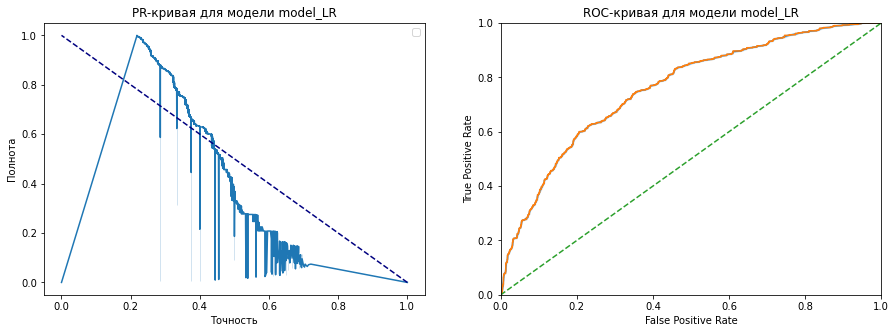

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271
0,model_RFS_10,0.547541,0.675990,0.841686
0,model_GridSearchCV_RFC_2,0.500824,0.671236,0.845789
0,model_LR,0.331081,0.455209,0.758750


In [52]:
metrics_graph ("model_LR", model_LR)

Действитеьлно видим, что все показатели очень низкие

## 2.5. Иcследование качества модели "Метод опорных векторов"

In [53]:
model_SVC = SVC(gamma=0.5, probability=True, random_state=12345)
model_SVC.fit(features_train, target_train)
train_predictions = model_SVC.predict(features_train)
print("Показатель f1 обучающей выборки: ", f1_score(target_train, train_predictions))
train_predictions_2 = model_SVC.predict(features_valid)
print("Показатель f1 валидационной выборки: ", f1_score(target_valid, train_predictions_2))

Показатель f1 обучающей выборки:  0.7178166838311019
Показатель f1 валидационной выборки:  0.545171339563863


Пока модель не проходит, но построим PR- и ROC кривые для выбранной модели и оценим такие показатели как "Площадь по PR-кривой" (он также известен как метод средней точности (average precision) - ap_rf и "Площадь по ROC-кривой" - auc_roc. Сохраним эти данные в датафрем metrics и далее будем его дополнять.

No handles with labels found to put in legend.


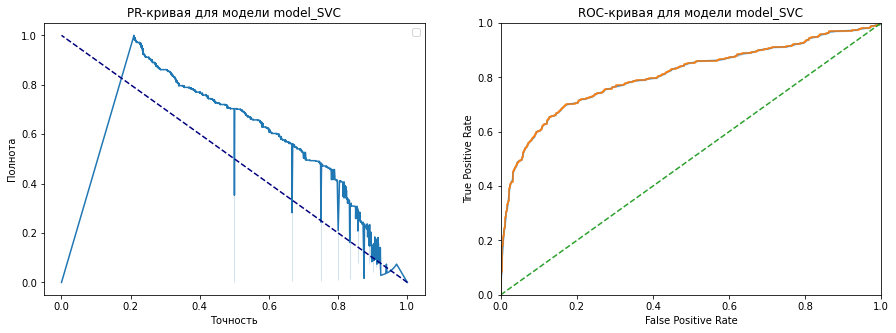

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271
0,model_RFS_10,0.547541,0.675990,0.841686
0,model_GridSearchCV_RFC_2,0.500824,0.671236,0.845789
0,model_LR,0.331081,0.455209,0.758750
0,model_SVC,0.545171,0.647679,0.808051


In [54]:
metrics_graph ("model_SVC", model_SVC)

In [55]:
probabilities_valid = model_SVC.predict_proba(features_valid)

probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.25, 0.35, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.3f}".format(threshold, precision, recall, f1))

Порог = 0.25 | Точность = 0.61, Полнота = 0.60, f1 = 0.606
Порог = 0.26 | Точность = 0.63, Полнота = 0.60, f1 = 0.614
Порог = 0.27 | Точность = 0.64, Полнота = 0.58, f1 = 0.608
Порог = 0.28 | Точность = 0.65, Полнота = 0.57, f1 = 0.608
Порог = 0.29 | Точность = 0.66, Полнота = 0.57, f1 = 0.609
Порог = 0.30 | Точность = 0.66, Полнота = 0.56, f1 = 0.609
Порог = 0.31 | Точность = 0.67, Полнота = 0.56, f1 = 0.608
Порог = 0.32 | Точность = 0.68, Полнота = 0.55, f1 = 0.606
Порог = 0.33 | Точность = 0.68, Полнота = 0.55, f1 = 0.606
Порог = 0.34 | Точность = 0.69, Полнота = 0.54, f1 = 0.607


При пороге 0,26 f1 = 0.614

### 2.4. Исследование качества модели "Метод опорных векторов" при его настройке с помощью GridSearchCV

In [56]:
model_SVC = SVC()
parametrs_SVC = {"kernel": ["rbf"], "C":(0.1, 1, 1000), "gamma": (0.1, 1, 10)}

grid_search_cv_model_SVC = GridSearchCV(model_SVC, parametrs_SVC, cv = 5, scoring ='f1')
grid_search_cv_model_SVC.fit(features_train, target_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (0.1, 1, 1000), 'gamma': (0.1, 1, 10),
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

Посмотрим на лучшие параметры

In [57]:
grid_search_cv_model_SVC.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Обучим модель model_GridSearchCV и определим f1 при этих параметрах 

In [58]:
grid_search_cv_model_SVC_2 = SVC(random_state=12345, probability=True, C = 1, gamma = 0.1, kernel = 'rbf').fit(features_train, target_train)

In [59]:
train_predictions = grid_search_cv_model_SVC_2.predict(features_valid)
print("f1_score_valid = ", f1_score(target_valid, train_predictions))

f1_score_valid =  0.5348460291734198


Модель не проходит, попробуем поменять порог классификации. А перед этим построим гафики и посмотрим параметры

No handles with labels found to put in legend.


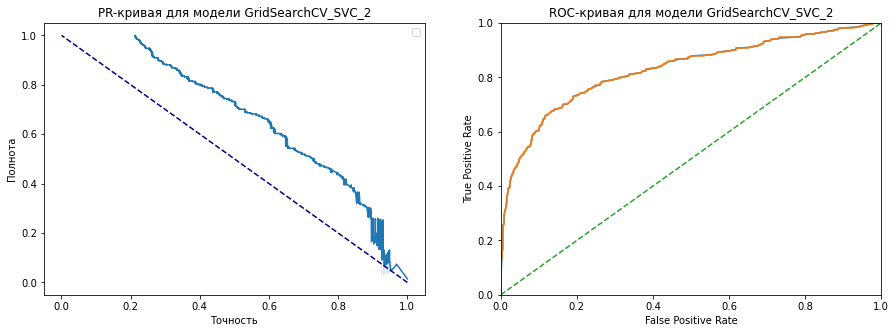

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271
0,model_RFS_10,0.547541,0.675990,0.841686
0,model_GridSearchCV_RFC_2,0.500824,0.671236,0.845789
0,model_LR,0.331081,0.455209,0.758750
0,model_SVC,0.545171,0.647679,0.808051
0,GridSearchCV_SVC_2,0.534846,0.674287,0.828990


In [60]:
metrics_graph ("GridSearchCV_SVC_2", grid_search_cv_model_SVC_2)

### Изменение качества модели, при измееннии порога классификации

In [61]:
probabilities_valid = grid_search_cv_model_SVC_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.1, 0.25, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.3f}".format(threshold, precision, recall, f1))
    


Порог = 0.10 | Точность = 0.32, Полнота = 0.87, f1 = 0.469
Порог = 0.11 | Точность = 0.36, Полнота = 0.83, f1 = 0.498
Порог = 0.12 | Точность = 0.39, Полнота = 0.80, f1 = 0.529
Порог = 0.13 | Точность = 0.44, Полнота = 0.77, f1 = 0.560
Порог = 0.14 | Точность = 0.47, Полнота = 0.74, f1 = 0.577
Порог = 0.15 | Точность = 0.50, Полнота = 0.72, f1 = 0.593
Порог = 0.16 | Точность = 0.52, Полнота = 0.70, f1 = 0.596
Порог = 0.17 | Точность = 0.54, Полнота = 0.69, f1 = 0.606
Порог = 0.18 | Точность = 0.56, Полнота = 0.68, f1 = 0.615
Порог = 0.19 | Точность = 0.58, Полнота = 0.67, f1 = 0.621
Порог = 0.20 | Точность = 0.60, Полнота = 0.66, f1 = 0.627
Порог = 0.21 | Точность = 0.60, Полнота = 0.64, f1 = 0.623
Порог = 0.22 | Точность = 0.61, Полнота = 0.63, f1 = 0.616
Порог = 0.23 | Точность = 0.62, Полнота = 0.61, f1 = 0.616
Порог = 0.24 | Точность = 0.63, Полнота = 0.60, f1 = 0.617


#### <font color='blue'> Промежуточный вывод: Целевого уровня f1 можно достичь при использовании модели "Метод случайных векторов":
* Обычный "Метод случайных векторов" при пороге 0,26 дает f1 = 0.613
* "Метод случайных векторов" с настройками (probability=True, C = 1, gamma = 0.1, kernel = 'rbf') при пороге 0,20 дает f1 = 0.626.

# 3. Борьба с дисбалансом

Отберем несколько моделей для дальнейшего тестирования при улучшении несбалансированной выборки. Предыдущий анализ позволяет выделить следующие эффективные модели:
* "Решающее дерево" со следующими параметрами: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 75}
* "Случайный лес" со следующими параметрами: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 60, 'n_estimators': 12}
* "Метод опорных векторов" с параметрами: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Применим следующие подходы к улучшению этих моделей:
* Взвешивание классов
* Upsampling
* Downsampling.




### 3.1. Улучшение качества работы решающего дерева

#### Взвешивание классов для Решающего дерева

Применим class_weight = 'balanced' и посмотрим как ведет себя решающее дерево при разных порогах класссификации. 

In [62]:
model_GridSearchCV_DTC_3 = DecisionTreeClassifier(random_state=12345, criterion = "gini", max_depth = 7, min_samples_leaf = 7, min_samples_split = 75, class_weight = 'balanced')
model_GridSearchCV_DTC_3.fit(features_train, target_train)
probabilities_valid = model_GridSearchCV_DTC_3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.65, 0.75, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.3f}".format(threshold, precision, recall, f1))


Порог = 0.65 | Точность = 0.57, Полнота = 0.61, f1 = 0.587
Порог = 0.66 | Точность = 0.62, Полнота = 0.58, f1 = 0.599
Порог = 0.67 | Точность = 0.62, Полнота = 0.58, f1 = 0.599
Порог = 0.68 | Точность = 0.62, Полнота = 0.58, f1 = 0.599
Порог = 0.69 | Точность = 0.62, Полнота = 0.58, f1 = 0.599
Порог = 0.70 | Точность = 0.64, Полнота = 0.57, f1 = 0.604
Порог = 0.71 | Точность = 0.64, Полнота = 0.57, f1 = 0.602
Порог = 0.72 | Точность = 0.68, Полнота = 0.54, f1 = 0.600
Порог = 0.73 | Точность = 0.68, Полнота = 0.54, f1 = 0.600
Порог = 0.74 | Точность = 0.70, Полнота = 0.53, f1 = 0.601


Модель проходит f1 = 0.604

No handles with labels found to put in legend.


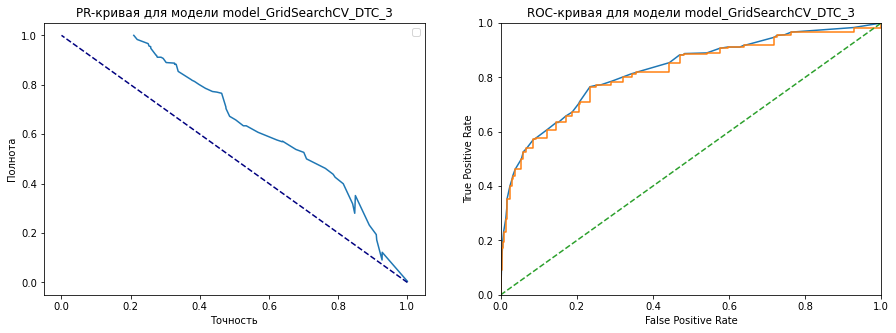

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271
0,model_RFS_10,0.547541,0.675990,0.841686
0,model_GridSearchCV_RFC_2,0.500824,0.671236,0.845789
0,model_LR,0.331081,0.455209,0.758750
0,model_SVC,0.545171,0.647679,0.808051
0,GridSearchCV_SVC_2,0.534846,0.674287,0.828990
0,model_GridSearchCV_DTC_3,0.569511,0.647359,0.827267


In [63]:
metrics_graph ("model_GridSearchCV_DTC_3", model_GridSearchCV_DTC_3)

Уменьшим количестов "отрицательных" объектов в обучающей выборке в четыре раза, чтобы их количество стало равно положительным объектам.

#### Уменьшение обучающей выборки

In [64]:

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled =pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
  
  
    
    return features_downsampled, target_downsampled


fraction = 0.25

features_downsampled, target_downsampled = downsample(features_train, target_train, fraction)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2397, 11)
(2397,)


Проверим как прошло деление

In [65]:
target_downsampled.value_counts()

0    1201
1    1196
Name: Exited, dtype: int64

Все ок. Теперь классы в обучающей выборке сбалансированы. Проверим как работаем модель,обученная на новой выборке. Но для этого нужно обучить модель заново.

In [66]:
#model_DTC = DecisionTreeClassifier()
#parametrs_DTC = {"criterion": ["gini", "entropy"], "max_depth": range(5, 8), "min_samples_split": range(30, 100, 5), "min_samples_leaf": range(1, 31, 2)}

#grid_search_cv_model_DTC = GridSearchCV(model_DTC, parametrs_DTC, cv = 5, scoring='f1')
#grid_search_cv_model_DTC.fit(features_downsampled, target_downsampled)

Посмотрим на лучшие параметры

In [67]:
#grid_search_cv_model_DTC.best_params_

Применим эти параметры и определим f1 при них 

In [68]:
#model_GridSearchCV_DTC_2 = grid_search_cv_model_DTC.best_estimator_
model_GridSearchCV_DTC_4 = DecisionTreeClassifier(random_state=12345, criterion = "entropy", max_depth = 7, min_samples_leaf = 21, min_samples_split = 55, class_weight = 'balanced') 
    

In [69]:
#model_GridSearchCV_DTC_2 = DecisionTreeClassifier(criterion = "gini", max_depth = 7, min_samples_leaf = 7, min_samples_split = 75, class_weight = 'balanced')
model_GridSearchCV_DTC_4.fit(features_downsampled, target_downsampled)
probabilities_valid = model_GridSearchCV_DTC_4.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.65, 0.75, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.3f}".format(threshold, precision, recall, f1))


Порог = 0.65 | Точность = 0.54, Полнота = 0.57, f1 = 0.556
Порог = 0.66 | Точность = 0.57, Полнота = 0.57, f1 = 0.568
Порог = 0.67 | Точность = 0.61, Полнота = 0.54, f1 = 0.574
Порог = 0.68 | Точность = 0.61, Полнота = 0.54, f1 = 0.574
Порог = 0.69 | Точность = 0.61, Полнота = 0.54, f1 = 0.574
Порог = 0.70 | Точность = 0.61, Полнота = 0.54, f1 = 0.574
Порог = 0.71 | Точность = 0.61, Полнота = 0.54, f1 = 0.574
Порог = 0.72 | Точность = 0.61, Полнота = 0.54, f1 = 0.574
Порог = 0.73 | Точность = 0.62, Полнота = 0.52, f1 = 0.564
Порог = 0.74 | Точность = 0.62, Полнота = 0.52, f1 = 0.564


Видим, что уменьшение обучающей выборки привело к ухудшению качества модели. А что по графикам? 

No handles with labels found to put in legend.


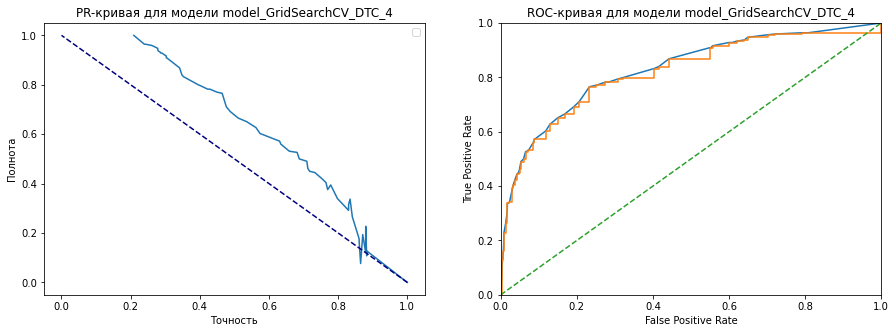

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271
0,model_RFS_10,0.547541,0.675990,0.841686
0,model_GridSearchCV_RFC_2,0.500824,0.671236,0.845789
0,model_LR,0.331081,0.455209,0.758750
0,model_SVC,0.545171,0.647679,0.808051
0,GridSearchCV_SVC_2,0.534846,0.674287,0.828990
0,model_GridSearchCV_DTC_3,0.569511,0.647359,0.827267
0,model_GridSearchCV_DTC_4,0.570605,0.629529,0.829406


In [70]:
metrics_graph ("model_GridSearchCV_DTC_4", model_GridSearchCV_DTC_4)

В целом показатели улучшились

#### Увеличение обучающей выборки

Увеличим количестов "положительных" объектов в обучающей выборке в 4 раз, чтобы их количество стало равно "отрицательных" объектам.

In [71]:

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    return features_upsampled, target_upsampled    

repeat = 4
features_upsampled, target_upsampled = upsample(features_train, target_train, repeat)


features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled)
    


print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 11)
(9588,)


Проверим как прошло деление

In [72]:
target_upsampled.value_counts()

0    4804
1    4784
Name: Exited, dtype: int64

Все ок. Теперь классы в обучаюей выборке сбалансированы. Проверим как работаем модель,обученная на новой выборке. Но для этого нужно обучить модель заново.

In [73]:
#model_DTC = DecisionTreeClassifier()
#parametrs_DTC = {"criterion": ["gini", "entropy"], "max_depth": range(5, 8), "min_samples_split": range(30, 100, 5), "min_samples_leaf": range(1, 31, 2)}

#grid_search_cv_model_DTC = GridSearchCV(model_DTC, parametrs_DTC,cv = 5, scoring='f1')
#grid_search_cv_model_DTC.fit(features_upsampled, target_upsampled)

Посмотрим на лучшие параметры

In [74]:
#grid_search_cv_model_DTC.best_params_

Применим эти параметры и определим f1 при них 

In [75]:
#model_GridSearchCV_DTC_2 = grid_search_cv_model_DTC.best_estimator_
model_GridSearchCV_DTC_5 = DecisionTreeClassifier(random_state=12345, criterion = "entropy", max_depth = 7, min_samples_leaf = 19, min_samples_split = 30, class_weight = 'balanced') 
    

In [76]:
#model_GridSearchCV_DTC_2 = DecisionTreeClassifier(criterion = "gini", max_depth = 7, min_samples_leaf = 7, min_samples_split = 75, class_weight = 'balanced')
model_GridSearchCV_DTC_5.fit(features_upsampled, target_upsampled)
probabilities_valid = model_GridSearchCV_DTC_5.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.6, 0.8, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.3f}".format(threshold, precision, recall, f1))


Порог = 0.60 | Точность = 0.54, Полнота = 0.63, f1 = 0.582
Порог = 0.61 | Точность = 0.54, Полнота = 0.63, f1 = 0.582
Порог = 0.62 | Точность = 0.54, Полнота = 0.63, f1 = 0.582
Порог = 0.63 | Точность = 0.54, Полнота = 0.63, f1 = 0.582
Порог = 0.64 | Точность = 0.59, Полнота = 0.57, f1 = 0.580
Порог = 0.65 | Точность = 0.59, Полнота = 0.57, f1 = 0.580
Порог = 0.66 | Точность = 0.65, Полнота = 0.54, f1 = 0.592
Порог = 0.67 | Точность = 0.67, Полнота = 0.52, f1 = 0.584
Порог = 0.68 | Точность = 0.69, Полнота = 0.51, f1 = 0.590
Порог = 0.69 | Точность = 0.69, Полнота = 0.51, f1 = 0.590
Порог = 0.70 | Точность = 0.69, Полнота = 0.51, f1 = 0.590
Порог = 0.71 | Точность = 0.69, Полнота = 0.51, f1 = 0.590
Порог = 0.72 | Точность = 0.75, Полнота = 0.48, f1 = 0.587
Порог = 0.73 | Точность = 0.75, Полнота = 0.48, f1 = 0.587
Порог = 0.74 | Точность = 0.75, Полнота = 0.48, f1 = 0.587
Порог = 0.75 | Точность = 0.75, Полнота = 0.48, f1 = 0.587
Порог = 0.76 | Точность = 0.78, Полнота = 0.47, f1 = 0.5

Модель проходит

No handles with labels found to put in legend.


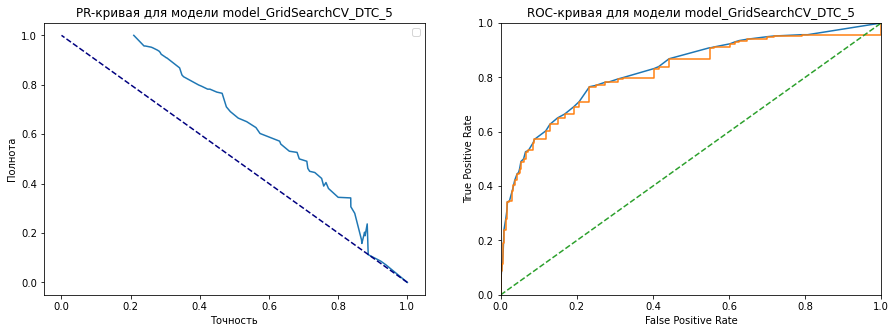

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271
0,model_RFS_10,0.547541,0.675990,0.841686
0,model_GridSearchCV_RFC_2,0.500824,0.671236,0.845789
0,model_LR,0.331081,0.455209,0.758750
0,model_SVC,0.545171,0.647679,0.808051
0,GridSearchCV_SVC_2,0.534846,0.674287,0.828990
0,model_GridSearchCV_DTC_3,0.569511,0.647359,0.827267
0,model_GridSearchCV_DTC_4,0.570605,0.629529,0.829406
0,model_GridSearchCV_DTC_5,0.570605,0.636586,0.827610


In [77]:
metrics_graph ("model_GridSearchCV_DTC_5", model_GridSearchCV_DTC_5)

## 3.2. Улучшение качества работы Случайного леса

#### Взвешивание классов для Случаного леса

Применим class_weight = 'balanced' и посмотрим как ведет себя решающее дерево при разных порогах класссификации. 

In [78]:
model_GridSearchCV_RFC_3 = RandomForestClassifier(random_state=12345, criterion = 'entropy', max_depth = 6, min_samples_leaf = 1, min_samples_split = 40, n_estimators = 12, class_weight = 'balanced')
model_GridSearchCV_RFC_3.fit(features_train, target_train)
probabilities_valid = model_GridSearchCV_RFC_3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


for threshold in np.arange(0.50, 0.65, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.3f}".format(threshold, precision, recall, f1))


Порог = 0.50 | Точность = 0.51, Полнота = 0.73, f1 = 0.603
Порог = 0.51 | Точность = 0.53, Полнота = 0.73, f1 = 0.611
Порог = 0.52 | Точность = 0.54, Полнота = 0.72, f1 = 0.615
Порог = 0.53 | Точность = 0.55, Полнота = 0.71, f1 = 0.619
Порог = 0.54 | Точность = 0.56, Полнота = 0.69, f1 = 0.616
Порог = 0.55 | Точность = 0.56, Полнота = 0.67, f1 = 0.611
Порог = 0.56 | Точность = 0.58, Полнота = 0.65, f1 = 0.612
Порог = 0.57 | Точность = 0.59, Полнота = 0.63, f1 = 0.612
Порог = 0.58 | Точность = 0.61, Полнота = 0.61, f1 = 0.610
Порог = 0.59 | Точность = 0.63, Полнота = 0.60, f1 = 0.616
Порог = 0.60 | Точность = 0.63, Полнота = 0.58, f1 = 0.604
Порог = 0.61 | Точность = 0.66, Полнота = 0.56, f1 = 0.608
Порог = 0.62 | Точность = 0.67, Полнота = 0.56, f1 = 0.607
Порог = 0.63 | Точность = 0.67, Полнота = 0.55, f1 = 0.603
Порог = 0.64 | Точность = 0.67, Полнота = 0.53, f1 = 0.592
Порог = 0.65 | Точность = 0.69, Полнота = 0.52, f1 = 0.596


Модель проходит

No handles with labels found to put in legend.


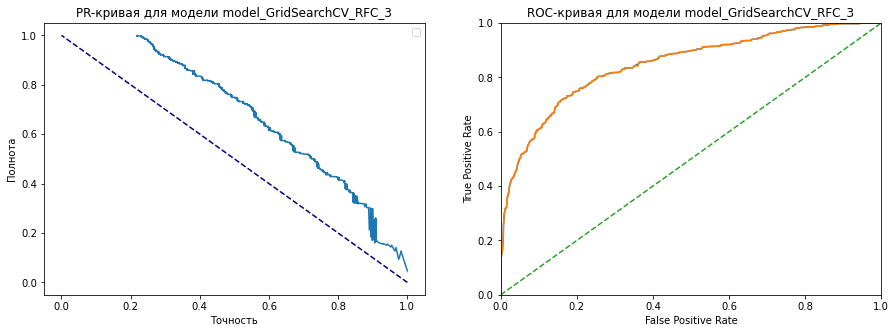

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271
0,model_RFS_10,0.547541,0.675990,0.841686
0,model_GridSearchCV_RFC_2,0.500824,0.671236,0.845789
0,model_LR,0.331081,0.455209,0.758750
0,model_SVC,0.545171,0.647679,0.808051
0,GridSearchCV_SVC_2,0.534846,0.674287,0.828990
0,model_GridSearchCV_DTC_3,0.569511,0.647359,0.827267
0,model_GridSearchCV_DTC_4,0.570605,0.629529,0.829406
0,model_GridSearchCV_DTC_5,0.570605,0.636586,0.827610


In [79]:
metrics_graph ("model_GridSearchCV_RFC_3", model_GridSearchCV_RFC_3)

#### Уменьшение обучающей выборки

In [80]:
#model_RFC = RandomForestClassifier()
#parametrs_RFC = {"criterion": ["gini", "entropy"], "n_estimators": range(12, 16), "max_depth": range(5, 7), "min_samples_split": range(30, 100, 10), "min_samples_leaf": range(1, 31, 5)}

#grid_search_cv_model_RFC = GridSearchCV(model_RFC, parametrs_RFC,cv = 5, scoring='f1')
#grid_search_cv_model_RFC.fit(features_downsampled, target_downsampled)

Посмотрим на лучшие параметры

In [81]:
#grid_search_cv_model_RFC.best_params_

Применим эти параметры и определим f1 при них 

In [82]:
#grid_search_cv_model_RFC_2 = grid_search_cv_model_RFC.best_estimator_

In [83]:
model_GridSearchCV_RFC_4 = RandomForestClassifier(random_state=12345, criterion = "gini", max_depth = 5, min_samples_leaf = 6, n_estimators = 12, min_samples_split = 60, class_weight = 'balanced')
model_GridSearchCV_RFC_4.fit(features_downsampled, target_downsampled)
probabilities_valid = model_GridSearchCV_RFC_4.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.50, 0.65, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.3f}".format(threshold, precision, recall, f1))


Порог = 0.50 | Точность = 0.50, Полнота = 0.73, f1 = 0.592
Порог = 0.51 | Точность = 0.51, Полнота = 0.72, f1 = 0.598
Порог = 0.52 | Точность = 0.53, Полнота = 0.71, f1 = 0.603
Порог = 0.53 | Точность = 0.53, Полнота = 0.69, f1 = 0.600
Порог = 0.54 | Точность = 0.54, Полнота = 0.68, f1 = 0.604
Порог = 0.55 | Точность = 0.56, Полнота = 0.67, f1 = 0.610
Порог = 0.56 | Точность = 0.57, Полнота = 0.65, f1 = 0.611
Порог = 0.57 | Точность = 0.58, Полнота = 0.64, f1 = 0.609
Порог = 0.58 | Точность = 0.60, Полнота = 0.63, f1 = 0.612
Порог = 0.59 | Точность = 0.61, Полнота = 0.62, f1 = 0.617
Порог = 0.60 | Точность = 0.62, Полнота = 0.62, f1 = 0.618
Порог = 0.61 | Точность = 0.63, Полнота = 0.60, f1 = 0.617
Порог = 0.62 | Точность = 0.66, Полнота = 0.59, f1 = 0.621
Порог = 0.63 | Точность = 0.66, Полнота = 0.57, f1 = 0.613
Порог = 0.64 | Точность = 0.67, Полнота = 0.55, f1 = 0.603
Порог = 0.65 | Точность = 0.69, Полнота = 0.52, f1 = 0.597


Модель проходит

No handles with labels found to put in legend.


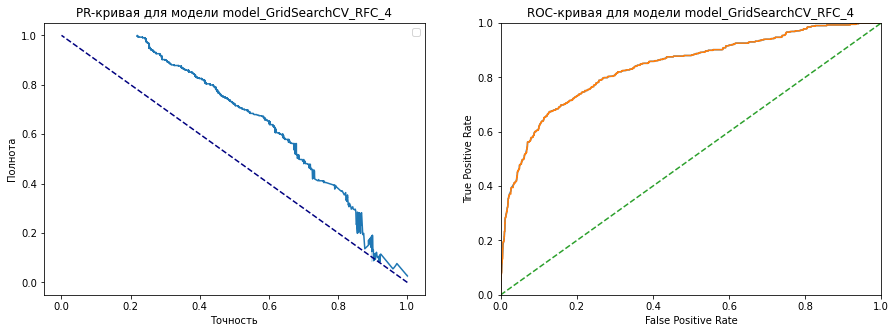

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271
0,model_RFS_10,0.547541,0.675990,0.841686
0,model_GridSearchCV_RFC_2,0.500824,0.671236,0.845789
0,model_LR,0.331081,0.455209,0.758750
0,model_SVC,0.545171,0.647679,0.808051
0,GridSearchCV_SVC_2,0.534846,0.674287,0.828990
0,model_GridSearchCV_DTC_3,0.569511,0.647359,0.827267
0,model_GridSearchCV_DTC_4,0.570605,0.629529,0.829406
0,model_GridSearchCV_DTC_5,0.570605,0.636586,0.827610


In [84]:
metrics_graph ("model_GridSearchCV_RFC_4", model_GridSearchCV_RFC_4)

Показатели еще улучшились

#### Увеличение обучающей выборки

In [85]:
#model_RFC = RandomForestClassifier()
#parametrs_RFC = {"criterion": ["gini", "entropy"], "n_estimators": range(12, 16), "max_depth": range(5, 7), "min_samples_split": range(30, 100, 10), "min_samples_leaf": range(1, 31, 5)}

#grid_search_cv_model_RFC = GridSearchCV(model_RFC, parametrs_RFC,cv = 5, scoring='f1')
#grid_search_cv_model_RFC.fit(features_upsampled, target_upsampled)

Посмотрим на лучшие параметры

In [86]:
#grid_search_cv_model_RFC.best_params_

Применим эти параметры и определим f1 при них 

In [87]:
#grid_search_cv_model_RFC_2 = grid_search_cv_model_RFC.best_estimator_

In [88]:
#model_GridSearchCV_DTC_2 = DecisionTreeClassifier(criterion = "gini", max_depth = 7, min_samples_leaf = 7, min_samples_split = 75, class_weight = 'balanced')
model_GridSearchCV_RFC_5 = RandomForestClassifier(random_state=12345, criterion = "gini", max_depth = 6, min_samples_leaf = 16, n_estimators = 12, min_samples_split = 70, class_weight = 'balanced')
model_GridSearchCV_RFC_5.fit(features_upsampled, target_upsampled)
probabilities_valid = model_GridSearchCV_RFC_5.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.55, 0.75, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.3f}".format(threshold, precision, recall, f1))


Порог = 0.55 | Точность = 0.58, Полнота = 0.66, f1 = 0.620
Порог = 0.56 | Точность = 0.60, Полнота = 0.65, f1 = 0.623
Порог = 0.57 | Точность = 0.61, Полнота = 0.64, f1 = 0.628
Порог = 0.58 | Точность = 0.62, Полнота = 0.64, f1 = 0.630
Порог = 0.59 | Точность = 0.64, Полнота = 0.62, f1 = 0.630
Порог = 0.60 | Точность = 0.66, Полнота = 0.61, f1 = 0.634
Порог = 0.61 | Точность = 0.66, Полнота = 0.60, f1 = 0.628
Порог = 0.62 | Точность = 0.67, Полнота = 0.58, f1 = 0.626
Порог = 0.63 | Точность = 0.68, Полнота = 0.56, f1 = 0.616
Порог = 0.64 | Точность = 0.69, Полнота = 0.55, f1 = 0.612
Порог = 0.65 | Точность = 0.69, Полнота = 0.54, f1 = 0.608
Порог = 0.66 | Точность = 0.71, Полнота = 0.52, f1 = 0.601
Порог = 0.67 | Точность = 0.71, Полнота = 0.50, f1 = 0.587
Порог = 0.68 | Точность = 0.72, Полнота = 0.49, f1 = 0.584
Порог = 0.69 | Точность = 0.75, Полнота = 0.48, f1 = 0.584
Порог = 0.70 | Точность = 0.77, Полнота = 0.47, f1 = 0.585
Порог = 0.71 | Точность = 0.77, Полнота = 0.45, f1 = 0.5

No handles with labels found to put in legend.


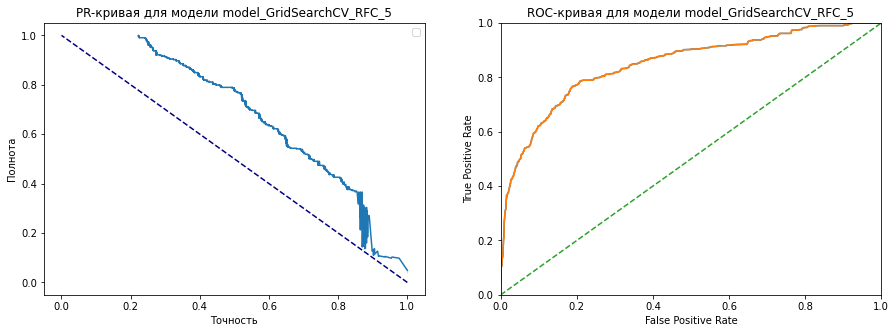

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271
0,model_RFS_10,0.547541,0.675990,0.841686
0,model_GridSearchCV_RFC_2,0.500824,0.671236,0.845789
0,model_LR,0.331081,0.455209,0.758750
0,model_SVC,0.545171,0.647679,0.808051
0,GridSearchCV_SVC_2,0.534846,0.674287,0.828990
0,model_GridSearchCV_DTC_3,0.569511,0.647359,0.827267
0,model_GridSearchCV_DTC_4,0.570605,0.629529,0.829406
0,model_GridSearchCV_DTC_5,0.570605,0.636586,0.827610


In [89]:
metrics_graph ("model_GridSearchCV_RFC_5", model_GridSearchCV_RFC_5)

Показатели выше средних

## 3.3. Улучшение качества работы Метода опорных векторов

#### Уменьшение обучающей выборки

In [90]:
#model_SVC = SVC()
#parametrs_SVC = {"kernel": ["rbf"], "C":(0.1, 1, 1000), "gamma": (0.1, 1, 10)}

#grid_search_cv_model_SVC = GridSearchCV(model_SVC, parametrs_SVC, cv = 5)
#grid_search_cv_model_SVC.fit(features_downsampled, target_downsampled)

<font color='blue'>Надо задать scoring='f1' в GridSearchCV(...). </font>


Посмотрим на лучшие параметры

In [91]:
#grid_search_cv_model_SVC.best_params_

Обучим модель model_GridSearchCV и определим f1 при этих параметрах 

In [92]:
grid_search_cv_model_SVC_3 = SVC(random_state=12345, probability=True, C = 1, gamma = 0.1, kernel = 'rbf', class_weight = 'balanced').fit(features_downsampled, target_downsampled)

In [93]:
probabilities_valid = grid_search_cv_model_SVC_3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.3, 0.5, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.3f}".format(threshold, precision, recall, f1))
    


Порог = 0.30 | Точность = 0.38, Полнота = 0.86, f1 = 0.524
Порог = 0.31 | Точность = 0.38, Полнота = 0.86, f1 = 0.529
Порог = 0.32 | Точность = 0.39, Полнота = 0.86, f1 = 0.536
Порог = 0.33 | Точность = 0.39, Полнота = 0.85, f1 = 0.540
Порог = 0.34 | Точность = 0.40, Полнота = 0.85, f1 = 0.544
Порог = 0.35 | Точность = 0.41, Полнота = 0.85, f1 = 0.549
Порог = 0.36 | Точность = 0.41, Полнота = 0.84, f1 = 0.554
Порог = 0.37 | Точность = 0.42, Полнота = 0.84, f1 = 0.556
Порог = 0.38 | Точность = 0.43, Полнота = 0.83, f1 = 0.563
Порог = 0.39 | Точность = 0.43, Полнота = 0.83, f1 = 0.566
Порог = 0.40 | Точность = 0.44, Полнота = 0.82, f1 = 0.570
Порог = 0.41 | Точность = 0.44, Полнота = 0.81, f1 = 0.572
Порог = 0.42 | Точность = 0.45, Полнота = 0.81, f1 = 0.579
Порог = 0.43 | Точность = 0.46, Полнота = 0.80, f1 = 0.582
Порог = 0.44 | Точность = 0.46, Полнота = 0.79, f1 = 0.580
Порог = 0.45 | Точность = 0.47, Полнота = 0.79, f1 = 0.588
Порог = 0.46 | Точность = 0.48, Полнота = 0.79, f1 = 0.5

Видим, что уменьшение обучающей выборки привело к ухудшению качества модели

No handles with labels found to put in legend.


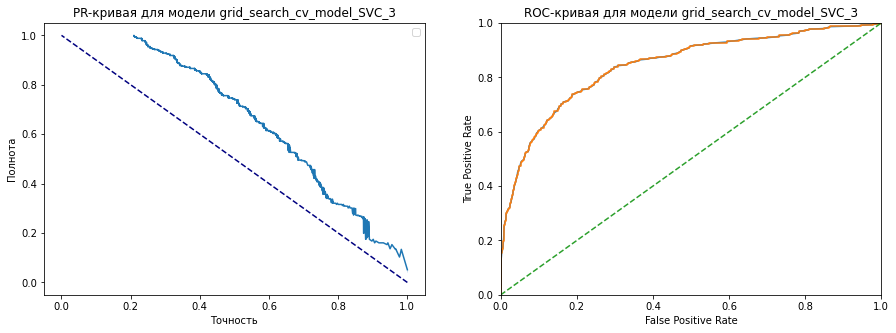

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271
0,model_RFS_10,0.547541,0.675990,0.841686
0,model_GridSearchCV_RFC_2,0.500824,0.671236,0.845789
0,model_LR,0.331081,0.455209,0.758750
0,model_SVC,0.545171,0.647679,0.808051
0,GridSearchCV_SVC_2,0.534846,0.674287,0.828990
0,model_GridSearchCV_DTC_3,0.569511,0.647359,0.827267
0,model_GridSearchCV_DTC_4,0.570605,0.629529,0.829406
0,model_GridSearchCV_DTC_5,0.570605,0.636586,0.827610


In [94]:
metrics_graph ("grid_search_cv_model_SVC_3", grid_search_cv_model_SVC_3)

Практически все показатели на максимуме

#### Увеличение обучающей выборки

In [95]:
#model_SVC = SVC()
#parametrs_SVC = {"kernel": ["rbf"], "C":(0.1, 1, 1000), "gamma": (0.1, 1, 10)}

#grid_search_cv_model_SVC = GridSearchCV(model_SVC, parametrs_SVC, cv = 5)
#grid_search_cv_model_SVC.fit(features_upsampled, target_upsampled)

Посмотрим на лучшие параметры

In [96]:
#grid_search_cv_model_SVC.best_params_

Обучим модель model_GridSearchCV и определим f1 при этих параметрах 

In [97]:
grid_search_cv_model_SVC_4 = SVC(random_state=12345, probability=True, C = 1, gamma = 0.1, kernel = 'rbf', class_weight = 'balanced').fit(features_upsampled, target_upsampled)

In [98]:
probabilities_valid = grid_search_cv_model_SVC_4.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.2, 0.4, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.2f}, Полнота = {:.2f}, f1 = {:.3f}".format(threshold, precision, recall, f1))
    


Порог = 0.20 | Точность = 0.34, Полнота = 0.89, f1 = 0.491
Порог = 0.21 | Точность = 0.35, Полнота = 0.87, f1 = 0.495
Порог = 0.22 | Точность = 0.36, Полнота = 0.87, f1 = 0.505
Порог = 0.23 | Точность = 0.36, Полнота = 0.87, f1 = 0.512
Порог = 0.24 | Точность = 0.37, Полнота = 0.87, f1 = 0.519
Порог = 0.25 | Точность = 0.38, Полнота = 0.86, f1 = 0.523
Порог = 0.26 | Точность = 0.39, Полнота = 0.86, f1 = 0.532
Порог = 0.27 | Точность = 0.39, Полнота = 0.85, f1 = 0.539
Порог = 0.28 | Точность = 0.40, Полнота = 0.85, f1 = 0.542
Порог = 0.29 | Точность = 0.40, Полнота = 0.85, f1 = 0.547
Порог = 0.30 | Точность = 0.41, Полнота = 0.84, f1 = 0.550
Порог = 0.31 | Точность = 0.41, Полнота = 0.83, f1 = 0.554
Порог = 0.32 | Точность = 0.42, Полнота = 0.82, f1 = 0.553
Порог = 0.33 | Точность = 0.42, Полнота = 0.82, f1 = 0.557
Порог = 0.34 | Точность = 0.43, Полнота = 0.81, f1 = 0.558
Порог = 0.35 | Точность = 0.43, Полнота = 0.81, f1 = 0.560
Порог = 0.36 | Точность = 0.44, Полнота = 0.80, f1 = 0.5

Видим, что уменьшение обучающей выборки привело к снижению показателя f1 = f1 = 0.610 против f1 = 0.620 

No handles with labels found to put in legend.


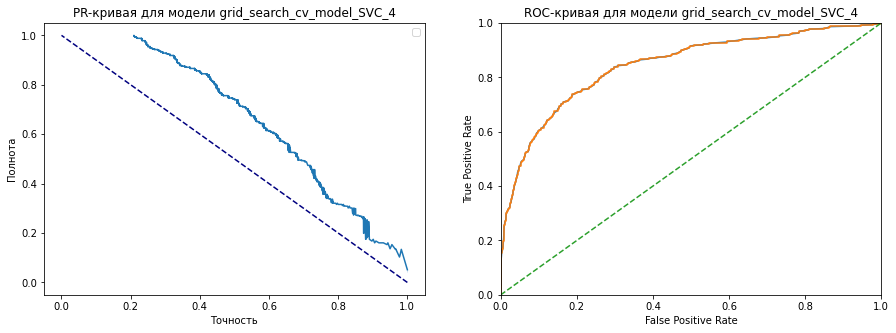

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_DTC_6,0.569697,0.628894,0.816463
0,model_GridSearchCV_DTC_2,0.569715,0.641523,0.830271
0,model_RFS_10,0.547541,0.675990,0.841686
0,model_GridSearchCV_RFC_2,0.500824,0.671236,0.845789
0,model_LR,0.331081,0.455209,0.758750
0,model_SVC,0.545171,0.647679,0.808051
0,GridSearchCV_SVC_2,0.534846,0.674287,0.828990
0,model_GridSearchCV_DTC_3,0.569511,0.647359,0.827267
0,model_GridSearchCV_DTC_4,0.570605,0.629529,0.829406
0,model_GridSearchCV_DTC_5,0.570605,0.636586,0.827610


In [99]:
metrics_graph ("grid_search_cv_model_SVC_4", grid_search_cv_model_SVC_4)

Выберим наилучшую модель для тестирования. 

Мы для улучшения отобрали три модели, которые и так уже прошли по целевому уровню f1. Поэтому дальнейщий выбор будем делать из них. Остальные удалим из таблицы.

In [101]:
models_best = metrics
models_best = models_best.reset_index(drop=True).drop([0,1,2,3,4,5,6], axis=0).reset_index(drop=True)

In [102]:
models_best

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC
0,model_GridSearchCV_DTC_3,0.569511,0.647359,0.827267
1,model_GridSearchCV_DTC_4,0.570605,0.629529,0.829406
2,model_GridSearchCV_DTC_5,0.570605,0.636586,0.827610
3,model_GridSearchCV_RFC_3,0.602956,0.685692,0.847881
4,model_GridSearchCV_RFC_4,0.589268,0.663106,0.838817
5,model_GridSearchCV_RFC_5,0.619094,0.682954,0.848660
6,grid_search_cv_model_SVC_3,0.595581,0.668414,0.843837
7,grid_search_cv_model_SVC_4,0.595581,0.668414,0.843837


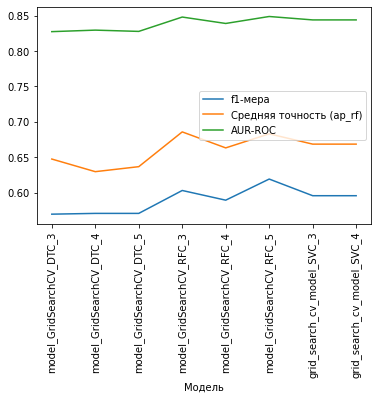

In [103]:
models_best.plot(x = "Модель", rot = 90)

По графику оценить какя модель лучше, сложно. Все эти модели прошли по параметру f1 , кроме того он не является самым подходящим для оценки в данном случае, поскольку оценивает модель только в при одном пороге классификации, не учитывая другии пороги (Именно поэтому в данной таблице он не везде больше 0,59). В этом смысле наиболее предпочтительны прараметры "Средняя точность (ap_rf)" и "AUR-ROC". Сложим их, и модель, которая набрет наибольшую сумму и будет лучшей.   

In [104]:
models_best["overall_score"] = models_best["Средняя точность (ap_rf)"] + models_best["AUR-ROC"]
models_best = models_best.sort_values('overall_score', ascending = False).reset_index(drop = True)
models_best

,Модель,f1-мера,Средняя точность (ap_rf),AUR-ROC,overall_score
0,model_GridSearchCV_RFC_3,0.602956,0.685692,0.847881,1.533574
1,model_GridSearchCV_RFC_5,0.619094,0.682954,0.848660,1.531614
2,grid_search_cv_model_SVC_3,0.595581,0.668414,0.843837,1.512250
3,grid_search_cv_model_SVC_4,0.595581,0.668414,0.843837,1.512250
4,model_GridSearchCV_RFC_4,0.589268,0.663106,0.838817,1.501923
5,model_GridSearchCV_DTC_3,0.569511,0.647359,0.827267,1.474626
6,model_GridSearchCV_DTC_5,0.570605,0.636586,0.827610,1.464196
7,model_GridSearchCV_DTC_4,0.570605,0.629529,0.829406,1.458936


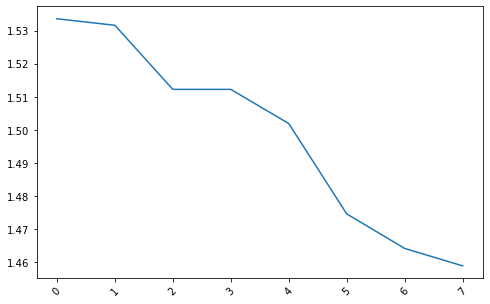

In [105]:
models_best["overall_score"].plot(x = "Модель", rot = 45, figsize = (8, 5))

Вот мы и определили лучшую модель для данной задачи - model_GridSearchCV_RFC_3 и на две тысячных от нее отстает model_GridSearchCV_RFC_5. Проверим их на тестовой выборке.

# 4. Тестирование модели

In [106]:
probabilities_test = model_GridSearchCV_RFC_3.predict(features_test)
f1_score(target_test, probabilities_test)

0.5877788554801164

In [107]:
probabilities_test = model_GridSearchCV_RFC_5.predict(features_test)
f1_score(target_test, probabilities_test)

0.59372026641294

Тестирование без подбора порога классификации проходтит модель model_GridSearchCV_RFC_5

### Выводы:
#### - В процессе исследования применялось несколько методик:
    * Решающее дерево
    * Случайный лес
    * Логистическая регрессия
    * Метод опорных векторов
#### - Некоторые из данных методов, при определенных порогах классификации, позволили добиться целевых показателей f1 даже без премения методов борьбы с дисбалансом классов
#### - Для повышения эффективности моделей, работающих на несбалансированных классах, были использованы следующие методы:
    * Взвешивание классов
    * Upsampling
    * Downsampling
#### - Применение данных методов позволило повысить эффективность, что видно на графике выше
#### - Самыми эффективными моделями оказались:
    * Случайный лес, обученный с помощью GridSearchCV с взвешиванием классов
    * Случайный лес, обученный с помощью GridSearchCV с взвешиванием классов и обучением на увеличеной обучающей выборке
#### - Одна модель прошла тестирование на тестовой выборке
